In [2]:
import random
import matplotlib.pyplot as plt
from IPython import display
import time

random.seed(32) # for reproducible random numbers

class Agent():
    def __init__(self, xlocation, ylocation):
        self.x = xlocation
        self.y = ylocation

agent1 = Agent(22, 55)
agent2 = Agent(66, 88)

def map_all_agents(listofagents):

    agents_XCoordinate = [] # this is an empty list that will store our X-coordinates
    agents_YCoordinate = [] # this is an empty list that will store our y-coordinates
    
    # use a for loop to add all the x attributes from our list of objects to the agents_XCoordinate list and all the y attributes from our list of objects to the agents_YCoordinate list 
    for agent in listofagents:
        agents_XCoordinate.append(agent.x)
        agents_YCoordinate.append(agent.y)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_facecolor('azure')
    ax.plot(agents_XCoordinate, agents_YCoordinate, 'o', markerfacecolor='purple')
    plt.xlim(-5,105)
    plt.ylim(-5,105)
    ax.set_title("Here's our map of the agents we have created:")
    plt.show()

agents_list = [agent1, agent2]

def moveagents(listofagents):
    for each_agent in listofagents:
        each_agent.x = random.randint(0,100)
        each_agent.y = random.randint(0,100)

def make_agents_dance(agentslist, num_steps=10):
    for i in range(num_steps):
        moveagents(agentslist)
        map_all_agents(agentslist)
        time.sleep(1) 
        display.clear_output(wait=True) 

###################################################

### add New_List_of_Agents
New_List_of_Agents = [Agent(random.randint(0,100), random.randint(0,100))for i in range(12)]  ### make 12 agents
###################################################


class AgentNew(Agent):
    def __init__(self, xlocation, ylocation, group, status="unhappy"):  
        super().__init__(xlocation, ylocation)                          
        self.group = group
        self.status = status


Problem 1

In [8]:
# The class AgentNew randomly picks whether an agent will be purple or gold.
# We may want to specify that instead, so lets create two subclasses of AgentNew.
# Let's call them PurpleAgents and GoldAgents.
# And create an analogous subclass called GoldAgents,
# which has the default group="Gold".

class PurpleAgents(AgentNew):
    def __init__(self, xlocation, ylocation, group="Purple", status="unhappy"):
        super().__init__(xlocation, ylocation, group, status)

class GoldAgents(AgentNew):
    def __init__(self, xlocation, ylocation, group="Gold", status="unhappy"):
        super().__init__(xlocation, ylocation, group, status)


b1 = PurpleAgents(3,6)
print(b1.group)


Purple


Problem 2

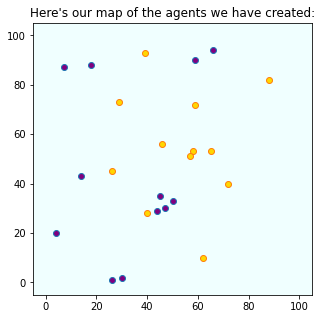

In [4]:
# Let's test our new classes and see if they work.

random.seed(15)
List_of_PurpleAgents = [PurpleAgents(random.randint(0, 100), random.randint(0, 100)) for i in range(12)]  # make 12 PurpleAgents
List_of_GoldAgents = [GoldAgents(random.randint(0, 100), random.randint(0, 100)) for i in range(12)] # make 12 GoldAgents
CombinedList = List_of_PurpleAgents + List_of_GoldAgents  # combine these into one list

def map_colorful_agents(CombinedList):
    Purple_XCoordinate = [agent.x for agent in CombinedList if agent.group=="Purple"] 
    Purple_YCoordinate = [agent.y for agent in CombinedList if agent.group=="Purple"] 
    Gold_XCoordinate = [agent.x for agent in CombinedList if agent.group=="Gold"]
    Gold_YCoordinate = [agent.y for agent in CombinedList if agent.group=="Gold"]

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_facecolor('azure')
    ax.plot(Purple_XCoordinate, Purple_YCoordinate, 'o', markerfacecolor='purple')
    ax.plot(Gold_XCoordinate, Gold_YCoordinate, 'o', markerfacecolor='gold')
    plt.xlim(-5,105)
    plt.ylim(-5,105)
    ax.set_title("Here's our map of the agents we have created:")
    plt.show()
    
map_colorful_agents(CombinedList)

Problem 3

In [5]:
# Now that we have some agents of different groups, let's add a
# method to AgentNew that allows agents to move if they are unhappy.

random.seed(38)
class AgentNew(Agent):
    def __init__(self, xlocation, ylocation, group, status="unhappy"):  
        super().__init__(xlocation, ylocation)                          
        self.group = group
        self.status = status

    def move_if_unhappy(self): 
        if self.status == "unhappy":  
            self.x = random.randint(0,100)
            self.y = random.randint(0,100)

a55 = AgentNew(24,11,"Purple")

a55.move_if_unhappy()

print(a55.x)  # should print 81

81


Problem 4

In [6]:
# We're going to build a method called 'check_neighbors' which will identify
# the agents that are within 10 x-coordinate AND 10 y-coordinate spaces of a
# given agent. Once those agents are identified, we'll calculate if enough of
# them are of the same group to meet our pre-determined threshold.

class AgentNew(Agent):
    def __init__(self, xlocation, ylocation, group, status="unhappy"):  
        super().__init__(xlocation, ylocation)                          
        self.group = group
        self.status = status

    def move_if_unhappy(self):  
        if self.status == "unhappy": 
            self.x = random.randint(0,100)
            self.y = random.randint(0,100)

    def check_neighbors(self, agentlist):
        zlist = list(filter(lambda agent: agent.x > self.x - 10 and agent.x < self.x + 10, agentlist))   
        zlist = list(filter(lambda agent: agent.y > self.y - 10 and agent.y < self.y + 10, zlist))
        same_group_neighbor = [agent for agent in zlist if agent.group == self.group] 
        opposite_group_neighbor = [agent for agent in zlist if agent.group != self.group] 
        if (len(same_group_neighbor)+.01)/(len(zlist)+.01) > group_affinity_threshold: # it checks the percentage of same group neighbors against some threshold to determine the agents happiness
            self.status="happy"
        else:
            self.status="unhappy"



Problem 6A

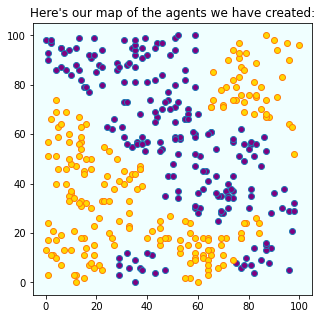

In [9]:
# Now we're ready to put it all together and run a few simulations.
# First, let's run a simulation in which there are 200 Purple agents and
# 200 Gold agents.
# Notice the group_affinity_threshold is set at .51.
# This means each purple or gold agent wants to be in a 'block' in which they
# are in the majority group.

### need to run problem 1 again ###

random.seed(2021)
group_affinity_threshold = .51
List_of_PurpleAgents = [PurpleAgents(random.randint(0, 100), random.randint(0, 100)) for i in range(200)]
List_of_GoldAgents = [GoldAgents(random.randint(0, 100), random.randint(0, 100)) for i in range(200)] 
testlist = List_of_PurpleAgents + List_of_GoldAgents # create a testlist that has 200 PurpleAgents and 200 GoldAgents

map_colorful_agents(testlist)
for x in range(15):
    for agent in (testlist):
        agent.check_neighbors(testlist)  
    for agent in (testlist):
        agent.move_if_unhappy()
    map_colorful_agents(testlist)
    time.sleep(.5)
    display.clear_output(wait=True)


Problem 6B

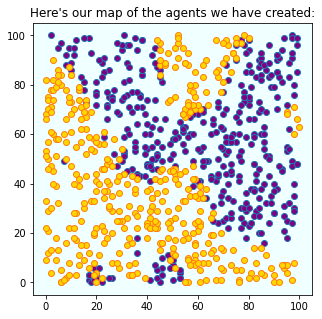

14


In [ ]:
# What happens if we run it again but with a threshold of only 0.4?
# Let's run this simulation with 400 of each type of agent.
# Modify the code below to test it out.

random.seed(202)
group_affinity_threshold = .4
List_of_PurpleAgents = [PurpleAgents(random.randint(0, 100), random.randint(0, 100)) for i in range(400)]
List_of_GoldAgents = [GoldAgents(random.randint(0, 100), random.randint(0, 100)) for i in range(400)]
testlist = List_of_PurpleAgents + List_of_GoldAgents  ### using your knowledge of list methods, combine these into one list

map_colorful_agents(testlist)
for x in range(15):
    for agent in (testlist):
        agent.check_neighbors(testlist)  #does this need any arguments?
    for agent in (testlist):
        agent.move_if_unhappy() # does this need any arguments?
    map_colorful_agents(testlist)
    print(x)
    time.sleep(.5)
    display.clear_output(wait=True)


Problem 7

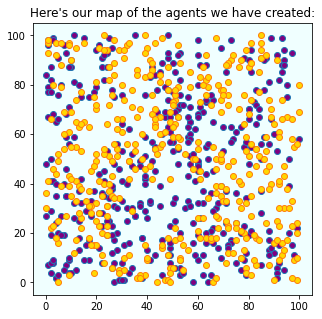

14


In [ ]:
# Even if people don't mind being a minority in their neighborhood, you still
# get segregation pretty easily according to this model. For a long time model
# such as this were used to argue that some degree of segregation was
# inevitable, and therefore it should not be a target of policy.

# Let's challenge that assumption.
# Make 2 new subclasses, 'PurpleDiversitySeekers' and 'GoldDiversitySeekers'.

# For these subclasses, make them seek out diversity instead of avoid it.
# Run some simulations with 300 traditional PurpleAgents, 300 traditional
# GoldAgents, 100 PurpleDiversitySeekers, and 100 GoldDiversitySeekers.

random.seed(11)
class PurpleDiversitySeekers(AgentNew):
    def __init__(self, xlocation, ylocation, group="Purple", status="unhappy"):
        super().__init__(xlocation, ylocation, group, status)
    def check_neighbors(self, agentlist):
        zlist = list(filter(lambda agent: agent.x > self.x - 10 and agent.x < self.x + 10, agentlist))   
        zlist = list(filter(lambda agent: agent.y > self.y - 10 and agent.y < self.y + 10, zlist))
        same_group_neighbor = [agent for agent in zlist if agent.group == self.group]
        opposite_group_neighbor = [agent for agent in zlist if agent.group != self.group] 
        if (len(opposite_group_neighbor)+.01)/(len(zlist)+.01) > group_affinity_threshold:  # it checks the percentage of same group neighbors against some threshold to determine the agents happiness
            self.status="happy"
        else:
            self.status="unhappy"

class GoldDiversitySeekers(AgentNew):
    def __init__(self, xlocation, ylocation, group="Gold", status="unhappy"):
        super().__init__(xlocation, ylocation, group, status)
    def check_neighbors(self, agentlist):
        zlist = list(filter(lambda agent: agent.x > self.x - 10 and agent.x < self.x + 10, agentlist))   
        zlist = list(filter(lambda agent: agent.y > self.y - 10 and agent.y < self.y + 10, zlist))
        same_group_neighbor = [agent for agent in zlist if agent.group == self.group] 
        opposite_group_neighbor = [agent for agent in zlist if agent.group != self.group] 
        if (len(opposite_group_neighbor)+.01)/(len(zlist)+.01) > group_affinity_threshold: # it checks the percentage of same group neighbors against some threshold to determine the agents happiness
            self.status="happy"
        else:
            self.status="unhappy"

List_of_PurpleAgents = [PurpleAgents(random.randint(0, 100), random.randint(0, 100)) for i in range(300)]
List_of_GoldAgents = [GoldAgents(random.randint(0, 100), random.randint(0, 100)) for i in range(300)]
List_of_PurpleDiversitySeekers = [PurpleDiversitySeekers(random.randint(0, 100), random.randint(0, 100)) for i in range(100)]
List_of_GoldDiversitySeekers = [GoldDiversitySeekers(random.randint(0, 100), random.randint(0, 100)) for i in range(100)]
testlist = List_of_PurpleAgents + List_of_GoldAgents + List_of_PurpleDiversitySeekers + List_of_GoldDiversitySeekers 

group_affinity_threshold = .51
map_colorful_agents(testlist)
for x in range(15):
    for agent in (testlist):
        agent.check_neighbors(testlist)  
    for agent in (testlist):
        agent.move_if_unhappy()
    map_colorful_agents(testlist)
    print(x)
    time.sleep(.5)
    display.clear_output(wait=True)